# Analysis of world wide video game sales 
This data from Kaggle.com contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

#### 1. Which year was the most succesful for Global, NA, EU and JP regions
#### 2. What publishers and platform of games contribute the most towards the video game industry
#### 3. Video game genres that most people are interested in
#### 4. Any correlation between the columns


In [2]:
df = pd.read_csv('vgsales.csv')

#### Overview of the data

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df['Year'].nunique()

39

In [4]:
print(df['Year'].max())
print(df['Year'].min())

2020.0
1980.0


#### Due to the frequency in which this dataset was updated, any data past early Year 2016 should be ignored and not taken into consideration

#### Checking null values

In [5]:
df.isnull().value_counts()

Rank   Name   Platform  Year   Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
False  False  False     False  False  False      False     False     False     False        False           16291
                        True   False  False      False     False     False     False        False             249
                        False  False  True       False     False     False     False        False              36
                        True   False  True       False     False     False     False        False              22
dtype: int64

In [6]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
df.shape

(16598, 11)

#### Dropping null values, resetting the index after dropping it and changing the datatype of 'Year' to integer from a float

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

#### Since data from 2016 onwards are incomplete, it is better to just remove any data past the end of year 2015

In [11]:
drop_row_index = df[df['Year'] > 2015].index
df = df.drop(drop_row_index)

In [12]:
df.shape

(15945, 11)

In [13]:
df.reset_index (drop = True)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
15940,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
15941,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
15942,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
15943,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [14]:
df['Year'] = df['Year'].astype(int)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### Bar Chart for Global Sales

In [15]:
df_globalsales = df.groupby(by=['Year'])['Global_Sales'].sum()

Text(0, 0.5, 'Sales')

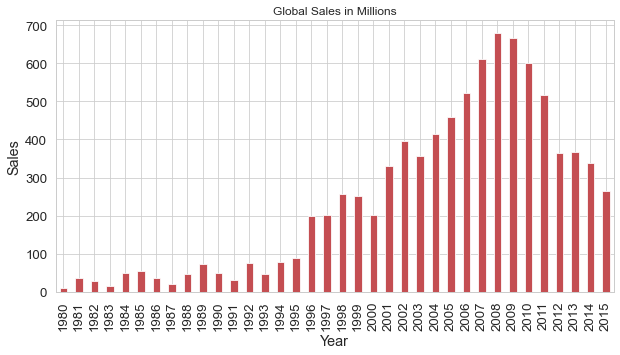

In [233]:
plt.figure(figsize=(10, 5))
df_globalsales.plot(kind='bar', color='r')
sns.set(style='darkgrid')
plt.title('Global Sales in Millions')
plt.xlabel('Year')
plt.ylabel('Sales')

#### Bar Chart for NA Sales

Text(0, 0.5, 'Sales')

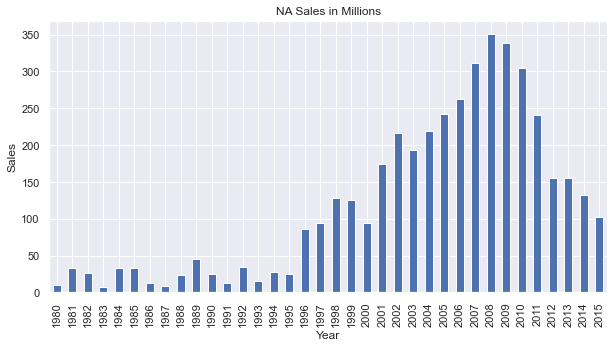

In [17]:
df_NAsales = df.groupby(by=['Year'])['NA_Sales'].sum()
plt.figure(figsize=(10, 5))
df_NAsales.plot(kind='bar', color='b')
sns.set(style='darkgrid')
plt.title('NA Sales in Millions')
plt.xlabel('Year')
plt.ylabel('Sales')

#### Bar Chart for EU Sales

Text(0, 0.5, 'Sales')

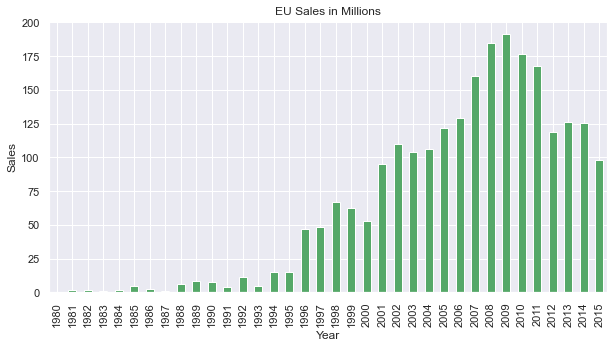

In [18]:
df_EUsales = df.groupby(by=['Year'])['EU_Sales'].sum()
plt.figure(figsize=(10, 5))
df_EUsales.plot(kind='bar', color='g')
sns.set(style='darkgrid')
plt.title('EU Sales in Millions')
plt.xlabel('Year')
plt.ylabel('Sales')

#### Bar Chart for JP Sales

Text(0, 0.5, 'Sales')

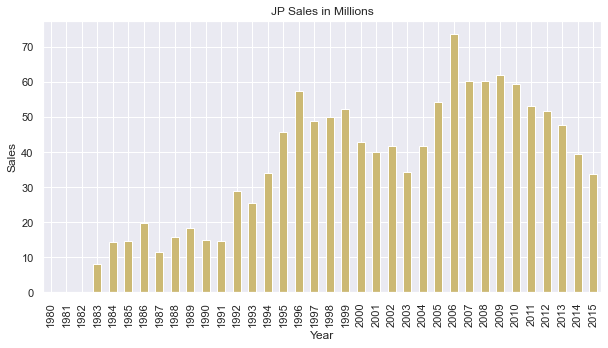

In [19]:
df_JPsales = df.groupby(by=['Year'])['JP_Sales'].sum()
plt.figure(figsize=(10, 5))
df_JPsales.plot(kind='bar', color='y')
sns.set(style='darkgrid')
plt.title('JP Sales in Millions')
plt.xlabel('Year')
plt.ylabel('Sales')


In [20]:
df2 = df.drop(['Rank', 'Name','Year','Global_Sales','Platform','Genre','Publisher'],axis = 1)

In [21]:
df2.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,41.49,29.02,3.77,8.46
1,29.08,3.58,6.81,0.77
2,15.85,12.88,3.79,3.31
3,15.75,11.01,3.28,2.96
4,11.27,8.89,10.22,1.00


In [22]:
df_pie = df2.sum(axis=0)
df_pie

NA_Sales       4304.72
EU_Sales       2379.93
JP_Sales       1270.55
Other_Sales     781.14
dtype: float64

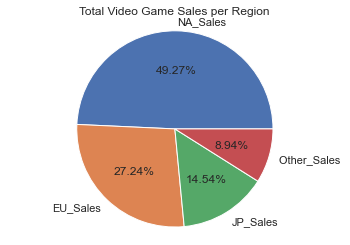

In [23]:
labels = 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales '
sizes = [4304.72, 2379.93, 1270.55, 781.14]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, shadow = False, autopct='%1.2f%%')
ax1.axis('equal')
plt.title('Total Video Game Sales per Region')
plt.show()

#### Analysis on Genre

In [24]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [25]:
df['Genre'].value_counts()

Action          3132
Sports          2266
Misc            1668
Role-Playing    1428
Shooter         1250
Adventure       1241
Racing          1205
Platform         865
Simulation       838
Fighting         822
Strategy         660
Puzzle           570
Name: Genre, dtype: int64

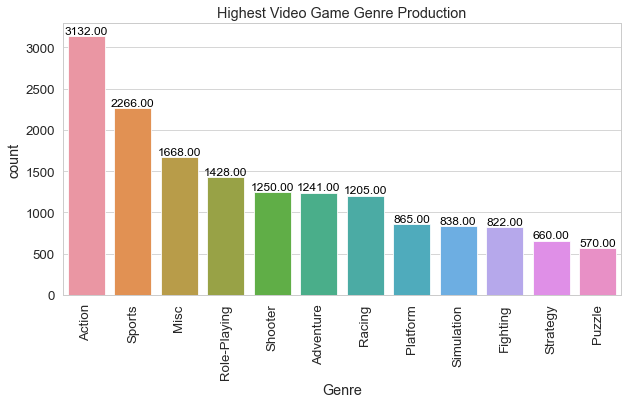

In [202]:
plt.figure(figsize=(10, 5))
g = sns.countplot(data=df,x='Genre',  order = df['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title ('Highest Video Game Genre Production')
ax = g 
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), 
        fontsize=12, color='black', ha='center', va='bottom')


In [27]:
df3 = df.drop(['Global_Sales','Rank', 'Name','Year','Platform','Publisher'],axis = 1)

In [28]:
df3_genre = df3.groupby(['Genre']).sum()
df3_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,855.90,510.12,152.86,183.09
Adventure,101.59,63.35,51.04,16.59
Fighting,219.14,98.85,86.51,35.73
Misc,396.70,211.68,105.86,73.89
Platform,445.20,199.78,130.54,51.20
Puzzle,122.01,50.52,56.68,12.47
Racing,356.60,235.17,56.60,76.49
Role-Playing,325.11,186.28,346.62,58.94
Shooter,567.72,302.75,37.57,99.48


#### This is the overall sales perfermance per region for each genre

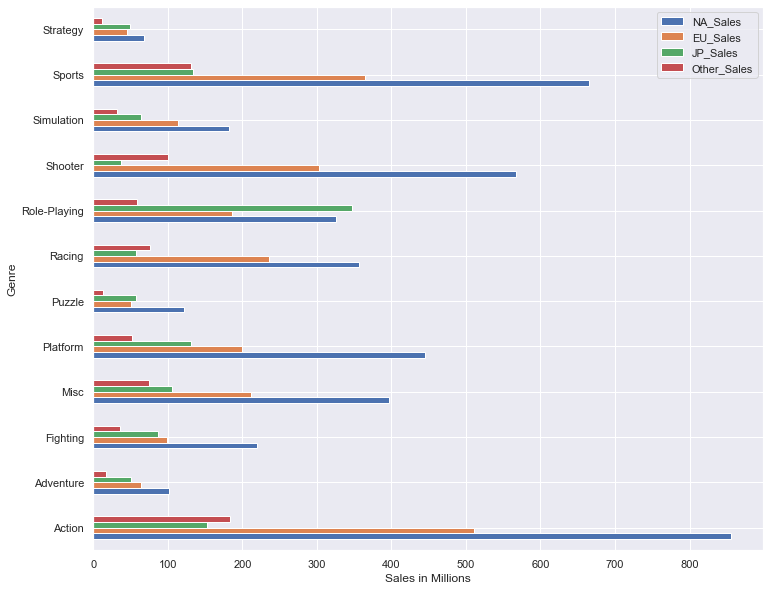

In [29]:
df3_genre.plot(kind='barh',figsize=(12,10))
plt.xlabel('Sales in Millions')
plt.ylabel('Genre')
plt.show()

#### And below is the extracted bar plots for each region

<AxesSubplot:title={'center':'Other Sales'}, ylabel='Genre'>

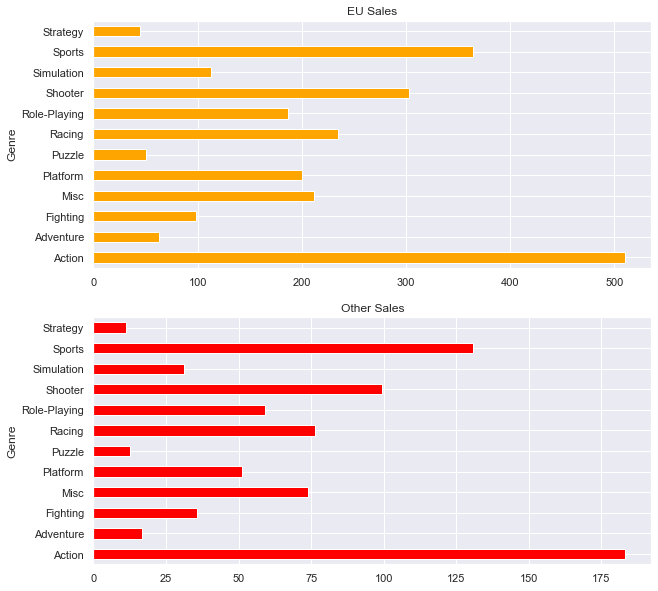

In [30]:
df3_genre = df3.groupby(['Genre']).sum()
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,10))
plt.subplot(2, 1, 1)
df3_genre['EU_Sales'].plot(kind='barh', color='orange', title='EU Sales')
plt.subplot(2, 1, 2)
df3_genre['Other_Sales'].plot(kind='barh', color='red', title='Other Sales')

<AxesSubplot:title={'center':'NA Sales'}, ylabel='Genre'>

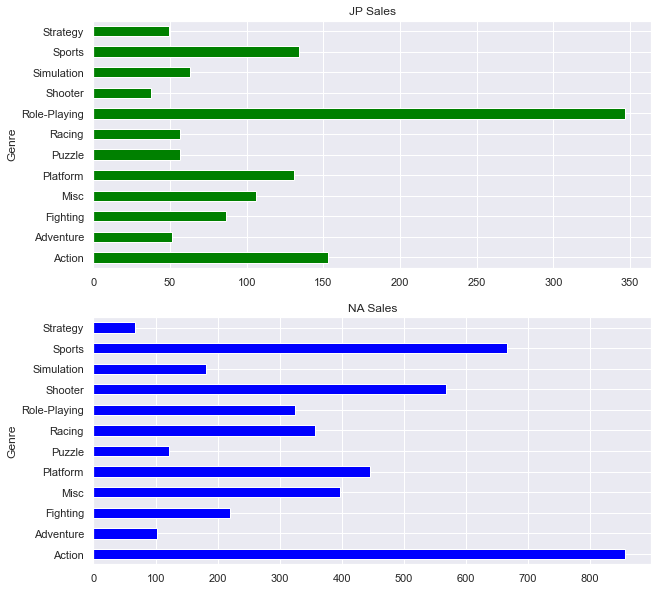

In [31]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,10))
plt.subplot(2, 1, 1)
df3_genre['JP_Sales'].plot(kind='barh', color='green', title = 'JP Sales')
plt.subplot(2, 1, 2)
df3_genre['NA_Sales'].plot(kind='barh', color='blue', title = 'NA Sales')

#### Analysis on Publishers & Platforms

In [36]:
df['Platform'].nunique()

31

In [46]:
df_platform = df[['Platform', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [74]:
df_platform=df_platform.groupby(['Platform']).sum().reset_index()
df_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2600,80.78,4.86,0.00,0.84
1,3DO,0.00,0.00,0.10,0.00
2,3DS,77.20,57.72,92.27,12.43
3,DC,5.43,1.69,8.56,0.27
4,DS,388.26,194.05,175.02,60.27


In [80]:
melt_platform = pd.melt(df_platform, id_vars='Platform', value_vars = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], var_name = 'Sales Area', value_name='Sale Price')
melt_platform.head()

,Platform,Sales Area,Sale Price
0,2600,NA_Sales,80.78
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,77.20
3,DC,NA_Sales,5.43
4,DS,NA_Sales,388.26


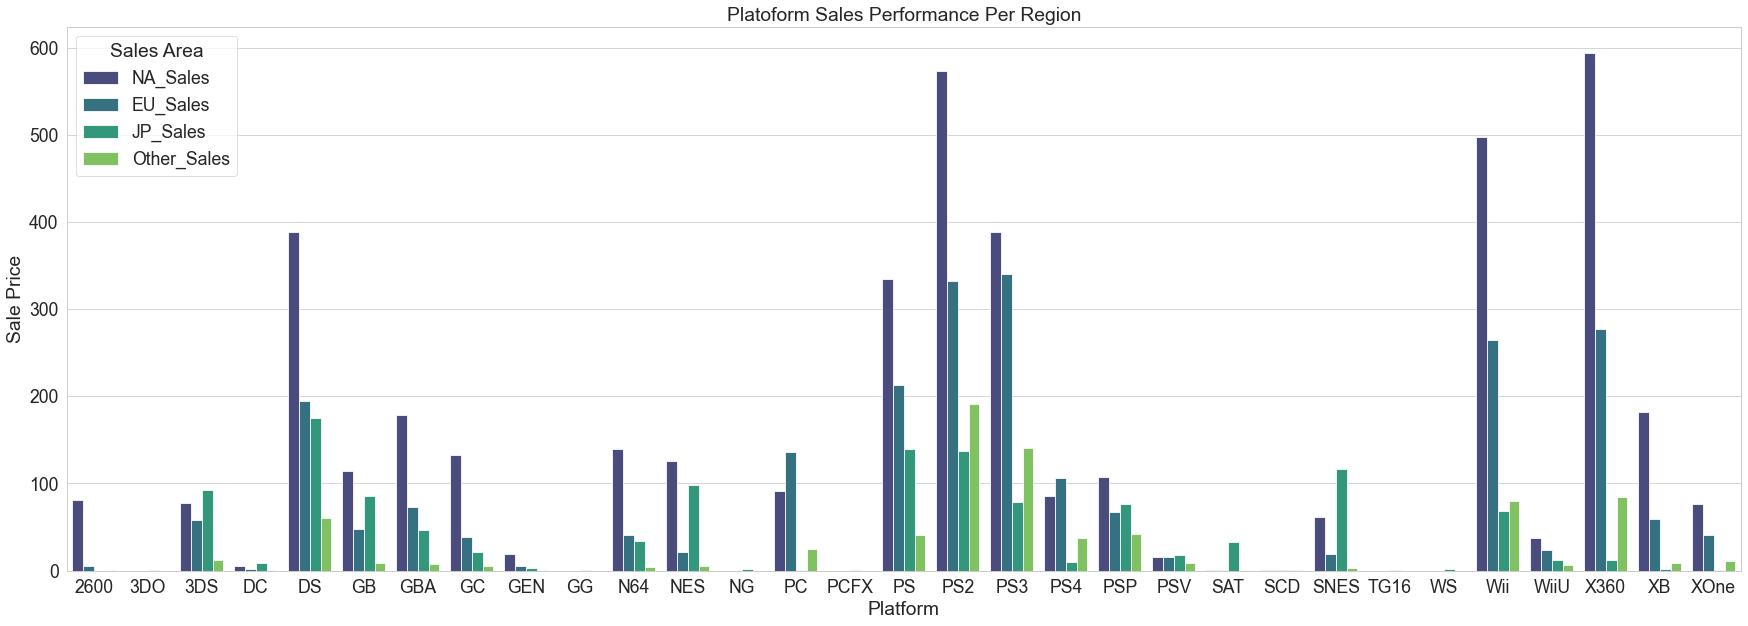

In [120]:
plt.figure(figsize=(30, 10))
sns.set_style('whitegrid')
sns.set_context('paper', font_scale = 2.0)
sns.barplot(x='Platform', y='Sale Price', hue='Sales Area', data= melt_platform, palette='viridis')
plt.title('Platoform Sales Performance Per Region')
plt.show()

In [149]:
df_publisher = df[['Publisher', 'Global_Sales']]
df_publisher.head()

,Publisher,Global_Sales
0,Nintendo,82.74
1,Nintendo,40.24
2,Nintendo,35.82
3,Nintendo,33.00
4,Nintendo,31.37


In [170]:
publisher_sales = df_publisher.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
publisher_sales = pd.DataFrame(publisher_sales).reset_index()
publisher_sales.head()

,Publisher,Global_Sales
0,Nintendo,1780.96
1,Electronic Arts,1081.14
2,Activision,717.74
3,Sony Computer Entertainment,600.72
4,Ubisoft,463.49


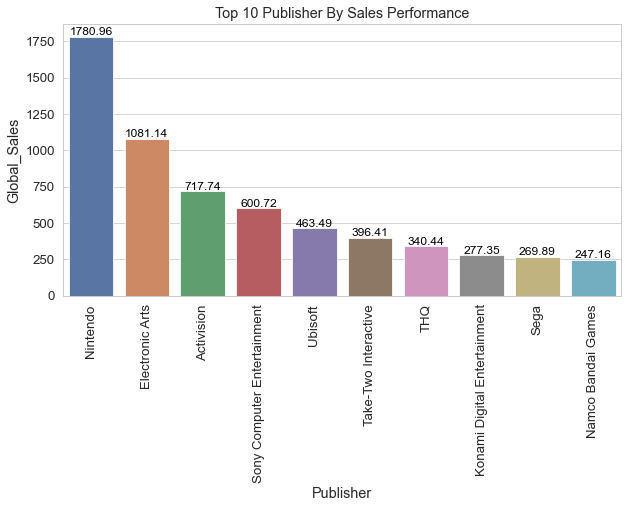

In [225]:
plt.figure(figsize=(10, 5))
sns.set_context('paper', font_scale = 1.5)
g = sns.barplot(x='Publisher',y='Global_Sales',data = publisher_sales)
plt.xticks(rotation=90)
plt.title('Top 10 Publisher By Sales Performance')
ax = g
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), 
        fontsize=12, color='black', ha='center', va='bottom')

In [213]:
publisher_year = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(10)
publisher_year = pd.DataFrame(publisher_year).reset_index()
publisher_year.head(10)

,Publisher,Year
0,Electronic Arts,1319
1,Activision,952
2,Ubisoft,904
3,Namco Bandai Games,888
4,Konami Digital Entertainment,815
5,THQ,712
6,Nintendo,686
7,Sony Computer Entertainment,677
8,Sega,622
9,Take-Two Interactive,400


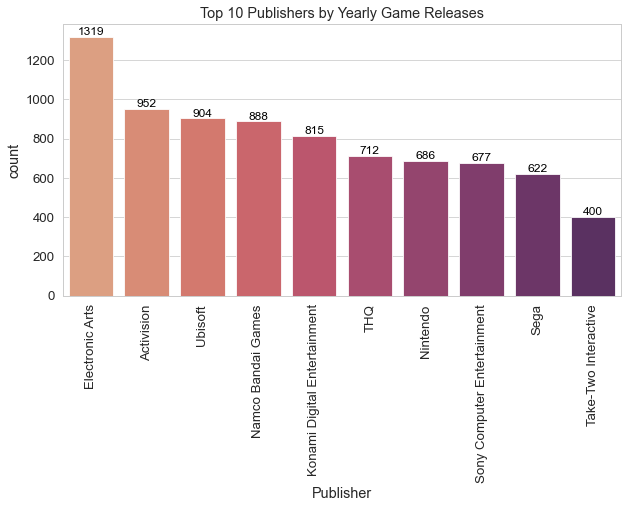

In [222]:
plt.figure(figsize=(10, 5))
sns.set_context('paper', font_scale = 1.5)
g = sns.countplot(x="Publisher", data=df, order = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:10].index, palette = 'flare')
plt.xticks(rotation=90)
plt.title('Top 10 Publishers by Yearly Game Releases')
ax = g
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.0f}'.format(p.get_height()), 
        fontsize=12, color='black', ha='center', va='bottom')


####  Correlation between columns

<AxesSubplot:>

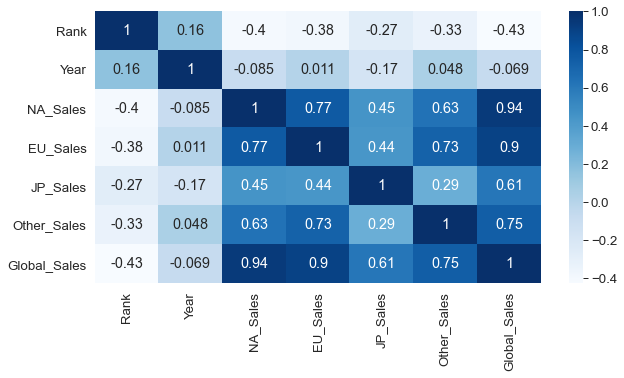

In [230]:
plt.figure(figsize=(10,5))
sns.set_context('paper', font_scale =1.5)
df_heat = df.corr()
sns.heatmap(df_heat, annot=True, cmap='Blues')

### 1. *Which year was the most succesful for Global, NA, EU and JP regions*

Around the early 2000s to 2011 was the booming of the video gaming industry for the EU , NA and 'Other' regions, with the introduction of newer generation of consoles like the Xbox 360 and PS3 being very accessible to the public. Japan on the other hand seems to have a consistent sales performance dating back since 1994, never dropping below 30 million worth in total video game sales for that region. But NA and EU region sales still contribute the most towards global sales of video games.


### 2. *What publisher and platform of games contribute the most towards the video game industry*
Based on global sales performance metric, Nintendo, Electronic Arts, Activision Ubisoft and Bandai Namco take the lead as top 5 gaming publishers in the world. Although only Electronic Arts, Ubisoft, and Activision have been churning out more games per year compared to every other publisher. Unsurprisingly it is the Playstation and Xbox series on consoles that take the lead among the most popular gaming platforms in the market, overshadowing most other platforms with pnly Nintendo DS and Wii traling slightly behind.

### 3. *Video game genres that most people are interested in*
Based on sales performance, Action , Sports and Shooter are the top 3 leading genres in most regions in the video game industry. Catering to consumer demand, companies also publish more Action and Sports video games. With the exception of Japan where Role-playing genre is the most in demand compared to Sports Shooters or Action

### 4. *Any correlation between the columns*
From the heatmap, NA and EU region sales are more correlated and ultimately contribute much to the global gaming industry, maybe due to western culture and influence being more similar with each other compared to Other regions and the Eastern countries.